<a href="https://colab.research.google.com/github/Sidhtang/AI-planet-assignment/blob/main/and_further_directions_in_transformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Vision Transformer
#First the image is split into smaller patches, and each of
#these patches is embedded with a linear projection. The results strongly resemble the
#token embeddings in BERT, and what follows is virtually identical. The patch embed‐
#dings are combined with position embeddings and then fed through an ordinary
#transformer encoder. During pretraining some of the patches are masked or distor‐
#ted, and the objective is to predict the average color of the masked patch
#
#


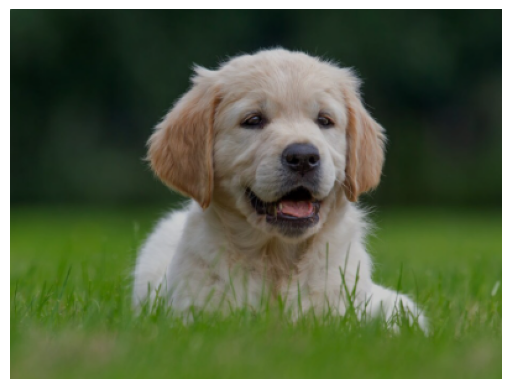

In [ ]:
# loading the vit model
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("/content/Screenshot 2024-09-08 112147.png")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from transformers import pipeline
image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


,label,score
0,golden retriever,0.829990
1,Labrador retriever,0.104102
2,"clumber, clumber spaniel",0.014028
3,Sussex spaniel,0.009715
4,kuvasz,0.005659


In [ ]:
#TAPAS (short for Table Parser)13 to the rescue! This model applies the Transformer
#architecture to tables by combining the tabular information with the query, as illus‐

In [ ]:
# @title working of TAPAS


book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12,
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74,
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121,
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141,
     "end_page": 144}
]

In [ ]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [ ]:
table_qa = pipeline("table-question-answering")


No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision 69ceee2 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.
TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
 "What is the total number of pages?",
 "On which page does the chapter about question-answering start?",
 "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision 69ceee2 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/models/tapas/tokenization_tapas.py:2673: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
/usr/local/lib/python3.10/dist-packages/transformers/models/tapas/tokenization_tapas.py:1472: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]


In [ ]:

for query, pred in zip(queries, preds):
    print(query)
    if pred["aggregator"] == "NONE":
        print("Predicted answer: " + pred["answer"])
    else:
        print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


In [ ]:
#The wav2vec 2.0 family of models are one of the most recent developments in ASR:
#they use a transformer layer in combination with a CNN

In [ ]:
asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

In [ ]:
! pip install datasets

In [ ]:
from datasets import load_dataset
ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])


{'file': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ]), 'sampling_rate': 16000}, 'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL', 'speaker_id': 1272, 'chapter_id': 128104, 'id': '1272-128104-0000'}


In [ ]:
import soundfile as sf
def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch
ds = ds.map(map_to_array)

In [ ]:
from IPython.display import Audio
display(Audio(ds[0]['speech'], rate=16000))

In [ ]:
# vison and text model
#Models such as LXMERT and VisualBERT use vision models like ResNets to extract
#features from the pictures and then use transformer encoders to combine them with
#the natural questions and predict an answer.17


In [ ]:
# @title Clip model
#clip combines text and vision but  for supervised tasks
# clip architecture combined the  text andi=mahe encoder that creates
# e,beddings for both images


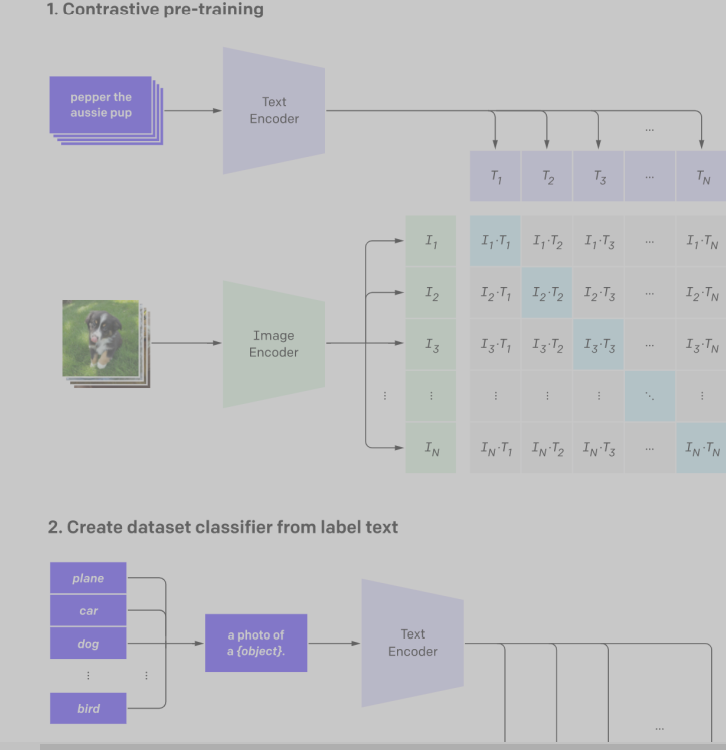

In [ ]:
# contrasive pre training
from PIL import Image #Removed extra indent
image = Image.open("/content/Screenshot 2024-09-08 174700.png")
image

In [ ]:
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


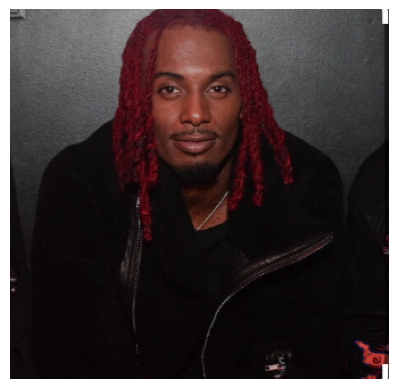

In [ ]:
image = Image.open("/content/Screenshot 2024-09-08 175303.png")
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
import torch
texts = ["a photo  of playboi carti", "a photo of a dog", "a photo of asap rocky"]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
 outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs


tensor([[0.2887, 0.0018, 0.7094]])